In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
nltk.download('punkt','averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to averaged_perceptron_tagger...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
df=pd.read_csv("reviews.csv")

In [ ]:
df=df.head(9000)
df['ID'] = np.arange(len(df))

In [ ]:
df['body'].values[0]

"I had the Samsung A600 for awhile which is absolute doo doo. You can read my review on it and detect my rage at the stupid thing. It finally died on me so I used this Nokia phone I bought in a garage sale for $1. I wonder y she sold it so cheap?... Bad: ===> I hate the menu. It takes forever to get to what you want because you have to scroll endlessly. Usually phones have numbered categories so u can simply press the # and get where you want to go. ===> It's a pain to put it on silent or vibrate. If you're in class and it rings, you have to turn it off immediately. There's no fast way to silence the damn thing. Always remember to put it on silent! I learned that the hard way. ===> It's so true about the case. It's a mission to get off and will break ur nails in the process. Also, you'll damage the case each time u try. For some reason the phone started giving me problems once I did succeed in opening it. ===> Buttons could be a bit bigger. Vibration could be stronger. Good: ===> Recep

In [ ]:
print(df.shape)

(9000, 9)


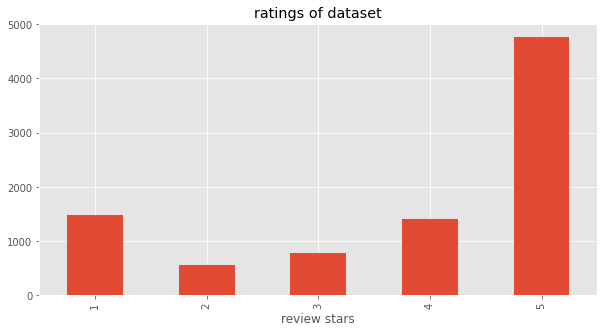

In [ ]:
## Represinting ratings
ax=df['rating'].value_counts().sort_index().plot(kind='bar',title='ratings of dataset', figsize=(10,5))
ax.set_xlabel('review stars')
plt.show()

In [ ]:
example=df['body'][50]
print(example)

This is not a "boost" phone and will not work as a GPS with Boost. Had to send it back. A huge pain for something that is $24. This is a rip-off.


In [ ]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['This', 'is', 'not', 'a', '``', 'boost', "''", 'phone', 'and', 'will']

In [ ]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('a', 'DT'),
 ('``', '``'),
 ('boost', 'NN'),
 ("''", "''"),
 ('phone', 'NN'),
 ('and', 'CC'),
 ('will', 'MD')]

In [ ]:
entity=nltk.chunk.ne_chunk(tagged)
entity.pprint()

(S
  This/DT
  is/VBZ
  not/RB
  a/DT
  ``/``
  boost/NN
  ''/''
  phone/NN
  and/CC
  will/MD
  not/RB
  work/VB
  as/IN
  a/DT
  (ORGANIZATION GPS/NNP)
  with/IN
  (PERSON Boost/NNP)
  ./.
  Had/NNP
  to/TO
  send/VB
  it/PRP
  back/RB
  ./.
  A/DT
  huge/JJ
  pain/NN
  for/IN
  something/NN
  that/WDT
  is/VBZ
  $/$
  24/CD
  ./.
  This/DT
  is/VBZ
  a/DT
  rip-off/NN
  ./.)


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sia= SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am ver very happy')

{'compound': 0.6115, 'neg': 0.0, 'neu': 0.429, 'pos': 0.571}

In [ ]:
sia.polarity_scores(example)

{'compound': 0.1779, 'neg': 0.099, 'neu': 0.751, 'pos': 0.15}

In [ ]:
res={}
for i, row in tqdm(df.iterrows(),total= len(df)):
  body=row['body']
  myid= row['ID']
  res[myid]=sia.polarity_scores(body)


  0%|          | 0/9000 [00:00<?, ?it/s]

In [ ]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'ID'})
vaders=vaders.merge(df,how='left')

In [ ]:
vaders.head()

,ID,neg,neu,pos,compound,asin,name,rating,date,verified,title,body,helpfulVotes
0,0,0.080,0.816,0.105,0.8629,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,1,0.020,0.876,0.104,0.8860,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,2,0.051,0.846,0.103,0.7992,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,3,0.000,0.844,0.156,0.9592,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,4,0.066,0.814,0.121,0.7745,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


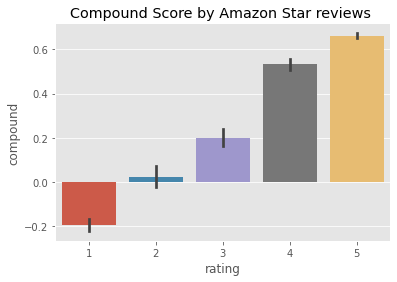

In [ ]:
ax= sns.barplot(data=vaders, x='rating',y='compound' )
ax.set_title('Compound Score by Amazon Star reviews ')
plt.show()

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]